In [562]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


In [563]:
os.getcwd()

'/aiffel/aiffel/camera_sticker/models'

In [564]:
from PIL import Image
import os

# aiffel 이 두번 겹친다. images 파일 안에 저장되어있는 사진을 불러와야하ㅏ므로
# 상대 경로 설정 (현재 위치 기준)
my_image_path = '../images/my.jpg' # 하나 위로 나가서 iamges로 들어가 지정
output_path = '../images/MyImage.png' # png로 나오게 

print(os.getcwd())

# 있으면 
if os.path.exists(my_image_path):
    # JPG 열어라
    image = Image.open(my_image_path)
    
    # JPG -> PNG로 변환 저장
    image.save(output_path)
    print(f"Image convert & Save success at {output_path}")
else:
    print(f"X: {os.path.abspath(my_image_path)}")

/aiffel/aiffel/camera_sticker/models
Image convert & Save success at ../images/MyImage.png


### 잘 잡아내는지 확인하기 위해서, 잡음이 많고 화질이 좋지 못하며, 명암대비도 큰, 지저분한 사진을 사용해보자

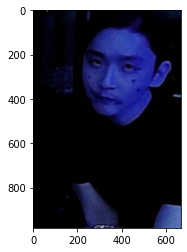

In [565]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/MyImage.png' # 내 이미지 경로
img_bgr = cv2.imread(my_image_path) # OpenCV로 읽기 bgr
img_show = img_bgr.copy() # 출력용 카피
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음) ?? 
plt.show() # 이미지를 출력해준다. (실제 출력)

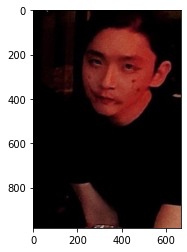

In [566]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # cv2의 고질적인 문제 
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### Origin vs Equalize vs CLAHE

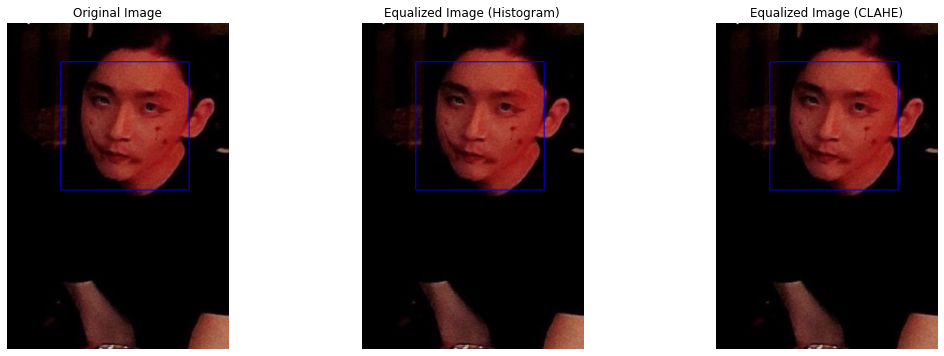

In [513]:
# Grayscale
img_gray = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)  # origin
equalized_img = cv2.equalizeHist(img_gray)  # hist
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
clahe_img = clahe.apply(img_gray) 

detector_hog = dlib.get_frontal_face_detector()

# 박스 
rects_original = detector_hog(img_gray, 1)
rects_equalized = detector_hog(equalized_img, 1)
rects_clahe = detector_hog(clahe_img, 1)

# 각 꼭지점 받아오기
def draw_faces(image, rects, title):
    img_copy = image.copy()
    for rect in rects:
        cv2.rectangle(img_copy, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
draw_faces(img_show, rects_original, "Original Image")

plt.subplot(1, 3, 2)
draw_faces(img_show, rects_equalized, "Equalized Image (Histogram)")

plt.subplot(1, 3, 3)
draw_faces(img_show, rects_clahe, "Equalized Image (CLAHE)")

plt.show()

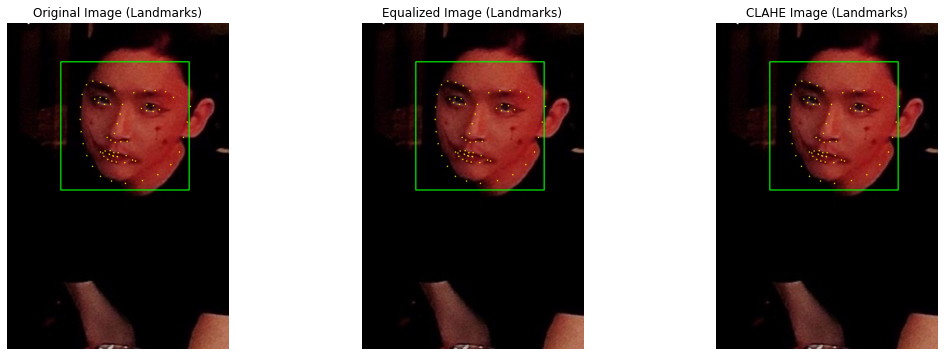

In [531]:
# Grayscale
img_gray = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)  # Original Grayscale
equalized_img = cv2.equalizeHist(img_gray)  # Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
clahe_img = clahe.apply(img_gray)  # CLAHE 적용

# 얼굴 감지 
rects_original = detector_hog(img_gray, 1)
rects_equalized = detector_hog(equalized_img, 1)
rects_clahe = detector_hog(clahe_img, 1)

# 얼굴 박스 +랜드파크 포인트 찍기 비교를 위해
def draw_faces_with_landmarks(image, rects, title):
    img_copy = image.copy()
    for dlib_rect in rects:
        l, t, r, b = dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom()
        cv2.rectangle(img_copy, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
        
        # 포인트찍기
        points = landmark_predictor(img_gray, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        for point in list_points:
            cv2.circle(img_copy, point, 2, (0, 255, 255), -1)  # 노란색 점
        
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')


plt.figure(figsize=(18, 6))

# ORIGIN
plt.subplot(1, 3, 1)
draw_faces_with_landmarks(img_show, rects_original, "Original Image (Landmarks)")

# 히스토그램 평활화
plt.subplot(1, 3, 2)
draw_faces_with_landmarks(img_show, rects_equalized, "Equalized Image (Landmarks)")

# CLAHE 
plt.subplot(1, 3, 3)
draw_faces_with_landmarks(img_show, rects_clahe, "CLAHE Image (Landmarks)")

plt.show()

### 박스 이미지 우측 하단은 명암과 관계없이 턱선을 조밀하게 잡아내지 못하는 모습이다. 
### 사진 자체에는 이미 얼굴 윤곽과 엣지가 명확해서 큰 의미가 없다
### 인간의 윤곽 자체를 고정된 틀로 보는 해당 탐지기의 문제가 있을수도

### 명암 전처리 없이 origin으로 진행

In [567]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [568]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸
🌫🛸


rectangles[[(161, 119) (546, 504)]]


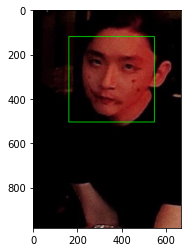

In [569]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [570]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


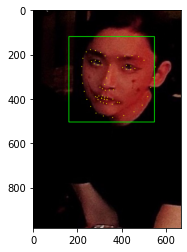

In [571]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [572]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    y = landmark[33][1] # 이미지에서 코 끝 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(325, 361)
(x,y) : (325,361)
(w,h) : (386,386)


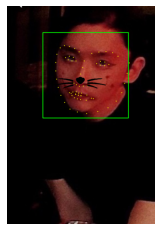

In [573]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)

# 스티커 크기 조정
w, h = 230, 230  
img_sticker = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)
sticker_height, sticker_width = img_sticker.shape[:2]
# 스티커 중심
x, y = 330, 460  # 코 중심 좌표
refined_x = x - w // 2 # x 중심에서 넓이 절반
refined_y = y - h # 중심 y에서 높이 절반

# 음수 처리 -> 스티커의 시작 좌표가 이미지 밖인 경우
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]  # 스티커의 왼쪽 
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]  # 스티커의 위쪽 
    refined_y = 0


# 스티커를 붙일 영역 추출 (좌표는 간단히 refined_x, refined_y와 크기로 추출)
sticker_area = img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width]

# 해당 범위에 있는 검은색 픽셀만 선택 True, 아니면 False
mask = cv2.inRange(img_sticker, (0, 0, 0), (10, 10, 10))  # 검은색 범위 지정
sticker_area[mask > 0] = img_sticker[mask > 0]  # 스티커 지역에서 골라낸 마스크만 합성 선택

img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = sticker_area

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 일단 그냥 추출한 결과
* np.where(==0)에서 문제가 발생한 결과다
* 원래 쓰였던, 킹.png는 배경이 검은색이라서 (0,0,0)이라면 크롭한 이미지로, (0,0,0)이 아니라면 스티커로 합성하는 것
* 때문에 해당 노드에 나와있는 흰색~ 부분은 정정이 필요함
* cat.png는 배경이 투명. 알파를 적용하여 4차원으로 가지않는다면? 
* 우리가 받아온 사진이 정확한 검은색인지, 검은색에 가까운 색깔인지 모르니 inRange()를 통해 검은색을 범위로 설정하여 스티커를 추출한다

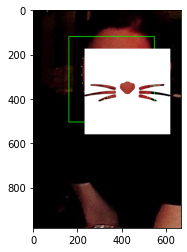

In [155]:
# 크기 조정 X 그냥 왕관 코드 그대로
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

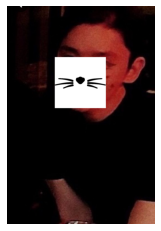

In [561]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

* **스티커 분리**

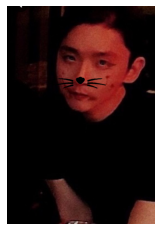

In [574]:
sticker_area = img_bgr[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width]
# 검은색 픽셀만 True 나머지 False
mask = cv2.inRange(img_sticker, (0, 0, 0), (10, 10, 10))  
# 마스크 조건을 활용하여 검은색 픽셀만 스티커에 남도록
sticker_area[mask > 0] = img_sticker[mask > 0] 

# 원본 사진에 
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

# 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

### 기울임 문제점
* 각도 역시 오른쪽으로 가야한다
* 스티커에서 고양이 마스크만 분리하지 않으면 아래와 같은 문제가 벌어진다.
### 해결
* 각도 반대 360- 로 해결
* 사진이 크롭된 부분 전체가 돌아감 -> 마스크만 때어내야함

기울기 (도): 6.581944655178011


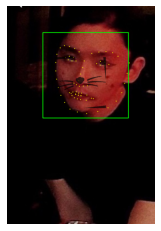

In [429]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)


# 스티커 크기 조정
w, h = 230, 230  
img_sticker = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

x, y = 330, 460  
refined_x = x - w // 2
refined_y = y - h

# 각도 계산 33번과 30번
x1, y1 = landmark[33][0], landmark[33][1]  # 코 끝 좌표
x2, y2 = landmark[30][0], landmark[30][1]  # 콧대 좌표
dx = x1 - x2
dy = y1 - y2
angle = np.arctan2(dx, dy) * (180.0 / np.pi)  # 라디안 -> degree
print(f"기울기 (도): {angle}")

# 스티커 회전
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)  # 중심을 기준으로 회전
rotated_sticker = cv2.warpAffine(img_sticker, rotation_matrix, (w, h))

# 음수 
if refined_x < 0:
    rotated_sticker = rotated_sticker[:, -refined_x:]  
    refined_x = 0
if refined_y < 0:
    rotated_sticker = rotated_sticker[-refined_y:, :]  
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width]

mask = cv2.inRange(rotated_sticker, (0, 0, 0), (10, 10, 10))  

alpha = 0.7  # 스티커 투명도 (0: 완전히 투명, 1: 완전히 불투명)
beta = 1 - alpha  # 원본 이미지 투명도
blended = sticker_area.copy()
blended[mask > 0] = cv2.addWeighted(sticker_area[mask > 0], beta, rotated_sticker[mask > 0], alpha, 0)

# 원본
img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = blended

# 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 기울임 + 연하게

기울기 (도): -6.581944655178011


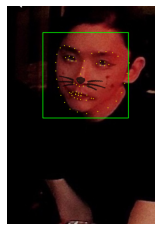

In [481]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)


w, h = 230, 230  
img_sticker = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

x, y = 330, 460  
refined_x = x - w // 2
refined_y = y - h

# 각도 계산 33번 코 끝, 30번 콧대 
x1, y1 = landmark[33][0], landmark[33][1]  # 코 끝 좌표
x2, y2 = landmark[30][0], landmark[30][1]  # 콧대 좌표
dx = x1 - x2
dy = y1 - y2
angle = -np.arctan2(dx, dy) * (180.0 / np.pi)  # 사진이 오른쪽으로 기울어져 있으니까 360-, -로 방향 적용
print(f"기울기 (도): {angle}")

# 위 출력 때와 동일하게 스티커와 마스크 분리
mask = cv2.inRange(img_sticker, (0, 0, 0), (10, 10, 10)) # 검은색만 True

## 두개의 이미지를 비교하여 and 연산 진행 
sticker_no_bg = cv2.bitwise_and(img_sticker, img_sticker, mask=mask)  # 배경 제거된(고양이 수염만 있는) 스티커

# 스티커와 마스크 회전
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)  # 중심을 기준으로 회전
rotated_sticker = cv2.warpAffine(sticker_no_bg, rotation_matrix, (w, h))
rotated_mask = cv2.warpAffine(mask, rotation_matrix, (w, h))

# 음수 좌표 처리 (스티커의 시작 좌표가 이미지 경계 바깥일 경우)
if refined_x < 0:
    rotated_sticker = rotated_sticker[:, -refined_x:]  # 스티커의 왼쪽 잘라내기
    rotated_mask = rotated_mask[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    rotated_sticker = rotated_sticker[-refined_y:, :]  # 스티커의 위쪽 잘라내기
    rotated_mask = rotated_mask[-refined_y:, :]
    refined_y = 0


# 스티커를 붙일 영역 추출
sticker_area = img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width]

# 블렌딩 (스티커 부분만 연하게 처리)
alpha = 0.7  # 스티커 투명도 (0: 완전히 투명, 1: 완전히 불투명)
beta = 1 - alpha  # 원본 이미지 투명도
blended = sticker_area.copy()
blended[rotated_mask > 0] = cv2.addWeighted(sticker_area[rotated_mask > 0], beta, rotated_sticker[rotated_mask > 0], alpha, 0)

# 결과를 원본 이미지에 반영
img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = blended

# 결과 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

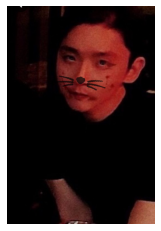

In [482]:
# 스티커를 붙일 영역 추출 (img_bgr 기준)
sticker_area_bgr = img_bgr[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width]

# 블렌딩 (스티커 부분만 연하게 처리)
alpha = 0.7  # 스티커 투명도
beta = 1 - alpha  # 원본 이미지 투명도
blended_bgr = sticker_area_bgr.copy()

# 기존 rotated_mask 활용하여 검은색이 아닌 부분만 합성
blended_bgr[rotated_mask > 0] = cv2.addWeighted(
    sticker_area_bgr[rotated_mask > 0], beta, rotated_sticker[rotated_mask > 0], alpha, 0
)

# 결과를 img_bgr에 반영
img_bgr[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = blended_bgr

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # BGR 이미지를 RGB로 변환
plt.axis('off')
plt.show()